In [43]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter(df, x_column, y_column, labels=None):
    plt.figure(figsize=(8, 6))
    
    if labels:
        filtered_df = df.dropna(subset=[x_column, y_column, labels])
    else:
        filtered_df = df.dropna(subset=[x_column, y_column])

    sns.scatterplot(x=x_column, y=y_column, data=filtered_df)
    
    if labels:
        for i in range(len(filtered_df)):
            plt.text(filtered_df[x_column].iloc[i], filtered_df[y_column].iloc[i], filtered_df[labels].iloc[i], fontsize=9)
    
    plt.title(f'Scatter Plot of {x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

main_stats = '../output/stats.csv'
df = pd.read_csv(main_stats)
df = df.groupby('name').mean().reset_index()
# df.head()
df.loc[df['name'] == 'bubblesort']


,name,MHB_num,MHB_gen_time,lock_num,lock_gen_time,read_cf_num,average_feasible_writes,average_infeasible_writes,read_cf_gen_time,MHB_add_time,lock_add_time,read_cf_add_time,COP_num,memory_used
4,bubblesort,1678.0,2.0,6324.0,15.2,1141.0,1.13848,9.17003,52.0,15.4,86.2,178.6,12569.0,84708.8


In [21]:
line_count = '../output/line_count.csv'
df_line_count = pd.read_csv(line_count)
df = df.merge(df_line_count, on='name')
df.head()

,name,MHB_num,MHB_gen_time,lock_num,lock_gen_time,read_cf_num,average_feasible_writes,average_infeasible_writes,read_cf_gen_time,MHB_add_time,lock_add_time,read_cf_add_time,COP_num,memory_used,line_count
0,account,23.0,0.0,0.0,0.0,6.0,1.00000,3.00000,0.0,7.0,7.0,7.0,28.0,30464.0,18
1,airlinetickets,26.0,0.0,0.0,0.0,9.0,1.00000,3.55556,0.0,7.0,7.0,7.0,42.0,30464.0,21
2,array,15.0,0.0,1.0,0.0,1.0,1.00000,1.00000,0.0,6.8,7.0,7.0,3.0,30464.0,12
3,boundedbuffer,13.0,0.0,0.0,0.0,2.0,1.50000,3.00000,0.0,7.0,7.0,7.0,12.0,30464.0,10
4,bubblesort,1678.0,2.0,6324.0,15.2,1141.0,1.13848,9.17003,52.0,15.4,86.2,178.6,12569.0,84708.8,1655


In [22]:
average_infeasible_sorted = df.sort_values('average_infeasible_writes', ascending=False)
average_feasible_sorted = df.sort_values('average_feasible_writes', ascending=False)
cols_of_interest = ['name', 'read_cf_num', 'average_infeasible_writes', 'average_feasible_writes', 'read_cf_gen_time', 'read_cf_add_time']
average_infeasible_sorted[cols_of_interest].head()

,name,read_cf_num,average_infeasible_writes,average_feasible_writes,read_cf_gen_time,read_cf_add_time
5,bufwriter,5280.0,756.5770,8.61742,130759.4,116082.2
17,readerswriters,4253.0,307.0190,4.00400,17609.6,36005.4
8,derby,19408.0,216.6690,3.14824,87742.6,149168.2
10,jigsaw,551.0,42.2541,1.36479,133.6,410.8
6,clean,286.0,41.9371,1.53147,67.2,235.6


In [23]:
average_feasible_sorted[cols_of_interest].head()

,name,read_cf_num,average_infeasible_writes,average_feasible_writes,read_cf_gen_time,read_cf_add_time
5,bufwriter,5280.0,756.5770,8.61742,130759.4,116082.2
17,readerswriters,4253.0,307.0190,4.00400,17609.6,36005.4
8,derby,19408.0,216.6690,3.14824,87742.6,149168.2
6,clean,286.0,41.9371,1.53147,67.2,235.6
3,boundedbuffer,2.0,3.0000,1.50000,0.0,7.0


In [24]:
single_cop_df_path = '../output/single_cop_timing.csv'
single_cop_df = pd.read_csv(single_cop_df_path)
single_cop_df = single_cop_df.groupby('name').mean().reset_index()
single_cop_df.head()

,name,single_cop_check_time,single_cop_check_memory_used
0,account,25.4,32256.0
1,airlinetickets,25.2,32256.0
2,array,22.2,32256.0
3,boundedbuffer,23.2,32256.0
4,bubblesort,6679.8,904591.2


In [25]:
df = df.merge(single_cop_df, on='name', how='outer')
df.head()

,name,MHB_num,MHB_gen_time,lock_num,lock_gen_time,read_cf_num,average_feasible_writes,average_infeasible_writes,read_cf_gen_time,MHB_add_time,lock_add_time,read_cf_add_time,COP_num,memory_used,line_count,single_cop_check_time,single_cop_check_memory_used
0,account,23.0,0.0,0.0,0.0,6.0,1.00000,3.00000,0.0,7.0,7.0,7.0,28.0,30464.0,18.0,25.4,32256.0
1,airlinetickets,26.0,0.0,0.0,0.0,9.0,1.00000,3.55556,0.0,7.0,7.0,7.0,42.0,30464.0,21.0,25.2,32256.0
2,array,15.0,0.0,1.0,0.0,1.0,1.00000,1.00000,0.0,6.8,7.0,7.0,3.0,30464.0,12.0,22.2,32256.0
3,boundedbuffer,13.0,0.0,0.0,0.0,2.0,1.50000,3.00000,0.0,7.0,7.0,7.0,12.0,30464.0,10.0,23.2,32256.0
4,bubblesort,1678.0,2.0,6324.0,15.2,1141.0,1.13848,9.17003,52.0,15.4,86.2,178.6,12569.0,84708.8,1655.0,6679.8,904591.2


In [40]:
row = df.loc[df['name'] == 'readerswriters']
row

,name,MHB_num,MHB_gen_time,lock_num,lock_gen_time,read_cf_num,average_feasible_writes,average_infeasible_writes,read_cf_gen_time,MHB_add_time,...,COP_num,memory_used,line_count,single_cop_check_time,single_cop_check_memory_used,total_read_cf_constraints,total_constraints,min_cop_check_time,max_cop_check_time,single_cop_max_min_diff


In [27]:
df['total_read_cf_constraints'] = df['read_cf_num'] * df['average_feasible_writes'] * df['average_infeasible_writes']

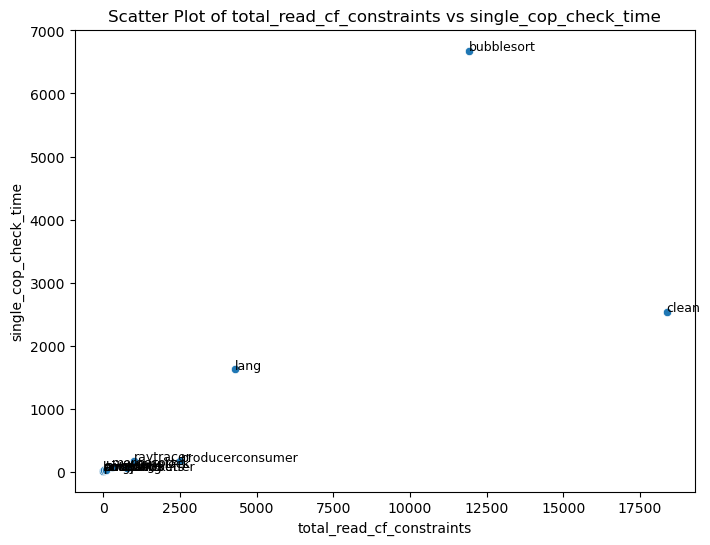

In [28]:
plot_scatter(df, 'total_read_cf_constraints', 'single_cop_check_time', 'name')

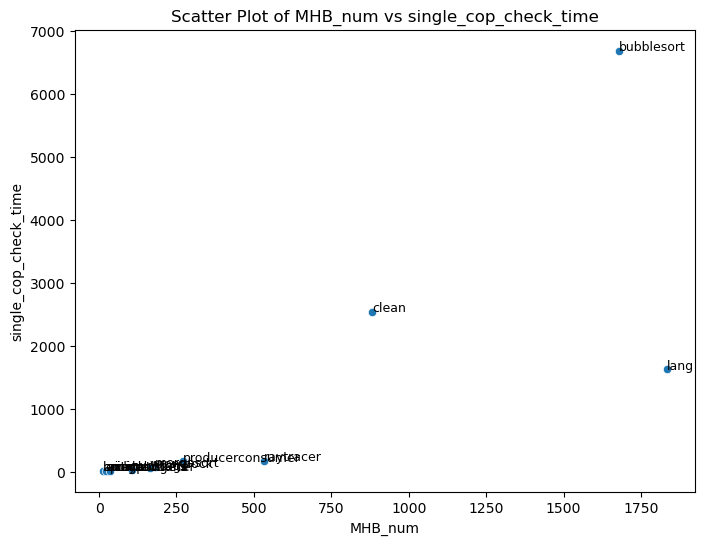

In [29]:
plot_scatter(df, 'MHB_num', 'single_cop_check_time', 'name')

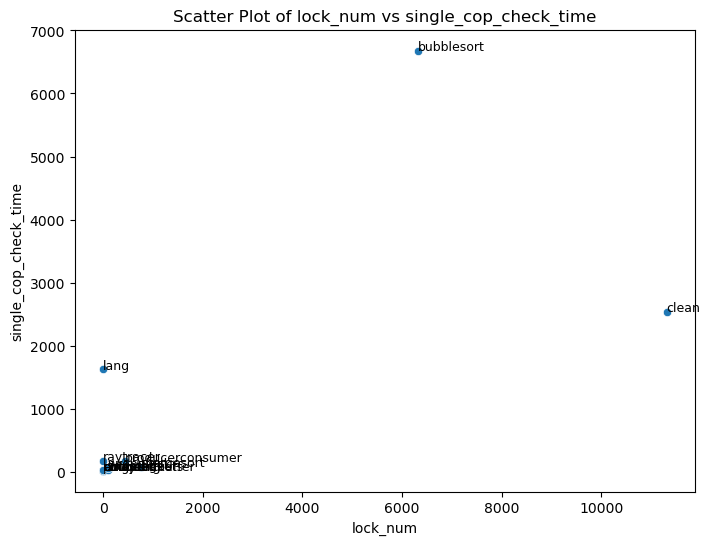

In [30]:
plot_scatter(df, 'lock_num', 'single_cop_check_time', 'name')

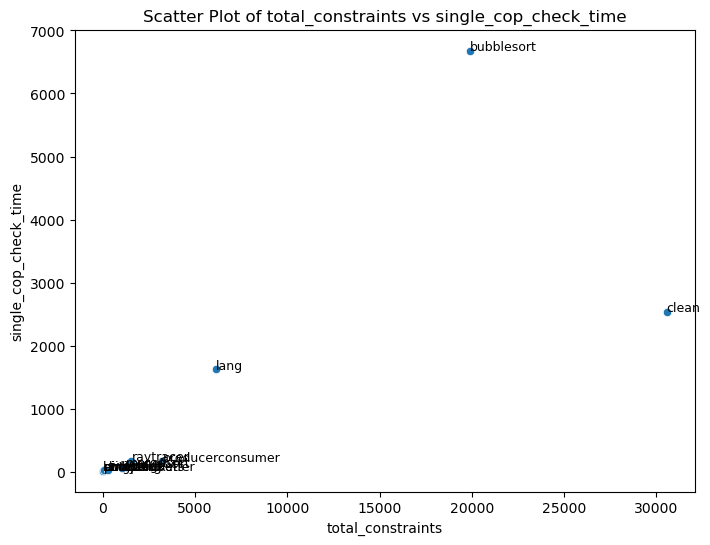

In [31]:
df['total_constraints'] = df['total_read_cf_constraints'] + df['MHB_num'] + df['lock_num']
plot_scatter(df, 'total_constraints', 'single_cop_check_time', 'name')

In [32]:
df = df.sort_values('total_constraints', ascending=False)
df = df[df['single_cop_check_time'].notna()]
cols_of_interest = ['name', 'MHB_num', 'lock_num', 'total_read_cf_constraints', 'total_constraints', 'single_cop_check_time']
df[cols_of_interest].head()

,name,MHB_num,lock_num,total_read_cf_constraints,total_constraints,single_cop_check_time
6,clean,881.0,11311.0,18368.467414,30560.467414,2541.0
4,bubblesort,1678.0,6324.0,11911.921056,19913.921056,6679.8
11,lang,1833.0,0.0,4290.173828,6123.173828,1632.0
15,producerconsumer,270.0,441.0,2520.920000,3231.920000,176.8
16,raytracer,532.0,0.0,1018.999860,1550.999860,179.6


In [33]:
file_path = '../output/cop_variances.csv'
cop_variances_df = pd.read_csv(file_path)
cop_variances_df = cop_variances_df.groupby('name').mean().reset_index()
cop_variances_df.head()

,name,min_cop_check_time,max_cop_check_time
0,account,6.0,7.0
1,airlinetickets,7.0,7.2
2,array,5.0,5.8
3,boundedbuffer,5.0,6.0
4,bubblesort,NaN,NaN


In [34]:
df = df.merge(cop_variances_df, on='name', how='outer')
df.head()

,name,MHB_num,MHB_gen_time,lock_num,lock_gen_time,read_cf_num,average_feasible_writes,average_infeasible_writes,read_cf_gen_time,MHB_add_time,...,read_cf_add_time,COP_num,memory_used,line_count,single_cop_check_time,single_cop_check_memory_used,total_read_cf_constraints,total_constraints,min_cop_check_time,max_cop_check_time
0,clean,881.0,1.0,11311.0,24.2,286.0,1.53147,41.93710,67.2,11.0,...,235.6,13181.0,84734.4,873.0,2541.0,202622.4,18368.467414,30560.467414,NaN,NaN
1,bubblesort,1678.0,2.0,6324.0,15.2,1141.0,1.13848,9.17003,52.0,15.4,...,178.6,12569.0,84708.8,1655.0,6679.8,904591.2,11911.921056,19913.921056,NaN,NaN
2,lang,1833.0,2.2,0.0,2.4,1300.0,1.03154,3.19923,20.0,16.2,...,42.8,4900.0,34944.0,1821.0,1632.0,321907.2,4290.173828,6123.173828,NaN,NaN
3,producerconsumer,270.0,0.0,441.0,1.0,125.0,1.24000,16.26400,8.0,8.0,...,23.4,2111.0,33152.0,257.0,176.8,41969.6,2520.920000,3231.920000,127.6,135.2
4,raytracer,532.0,0.0,0.0,0.0,514.0,1.00000,1.98249,10.0,9.0,...,17.2,1265.0,31360.0,528.0,179.6,72396.8,1018.999860,1550.999860,123.8,590.2


In [35]:
df['single_cop_max_min_diff'] = df['max_cop_check_time'] - df['min_cop_check_time']
df.head()

,name,MHB_num,MHB_gen_time,lock_num,lock_gen_time,read_cf_num,average_feasible_writes,average_infeasible_writes,read_cf_gen_time,MHB_add_time,...,COP_num,memory_used,line_count,single_cop_check_time,single_cop_check_memory_used,total_read_cf_constraints,total_constraints,min_cop_check_time,max_cop_check_time,single_cop_max_min_diff
0,clean,881.0,1.0,11311.0,24.2,286.0,1.53147,41.93710,67.2,11.0,...,13181.0,84734.4,873.0,2541.0,202622.4,18368.467414,30560.467414,NaN,NaN,NaN
1,bubblesort,1678.0,2.0,6324.0,15.2,1141.0,1.13848,9.17003,52.0,15.4,...,12569.0,84708.8,1655.0,6679.8,904591.2,11911.921056,19913.921056,NaN,NaN,NaN
2,lang,1833.0,2.2,0.0,2.4,1300.0,1.03154,3.19923,20.0,16.2,...,4900.0,34944.0,1821.0,1632.0,321907.2,4290.173828,6123.173828,NaN,NaN,NaN
3,producerconsumer,270.0,0.0,441.0,1.0,125.0,1.24000,16.26400,8.0,8.0,...,2111.0,33152.0,257.0,176.8,41969.6,2520.920000,3231.920000,127.6,135.2,7.6
4,raytracer,532.0,0.0,0.0,0.0,514.0,1.00000,1.98249,10.0,9.0,...,1265.0,31360.0,528.0,179.6,72396.8,1018.999860,1550.999860,123.8,590.2,466.4


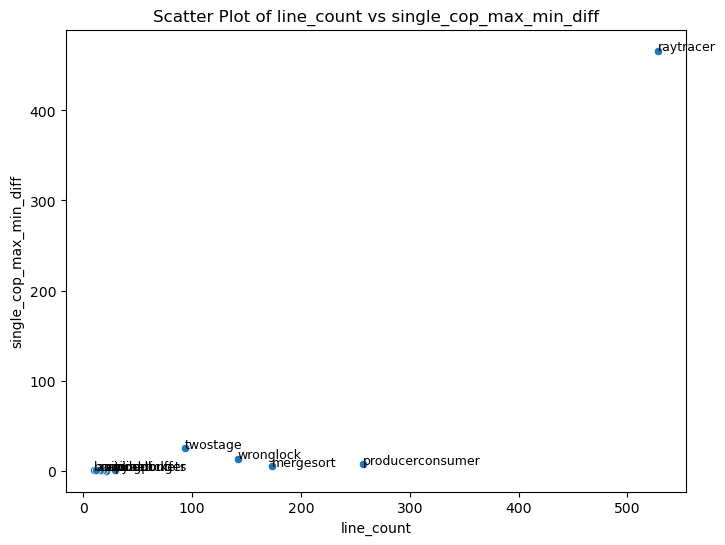

In [36]:
plot_scatter(df, 'line_count', 'single_cop_max_min_diff', 'name')

In [37]:
cols_of_interest = ['name', 'line_count','min_cop_check_time', 'max_cop_check_time', 'single_cop_max_min_diff']
df.sort_values('single_cop_max_min_diff', ascending=False).head()[cols_of_interest]

,name,line_count,min_cop_check_time,max_cop_check_time,single_cop_max_min_diff
4,raytracer,528.0,123.8,590.2,466.4
7,twostage,93.0,16.0,41.0,25.0
6,wronglock,142.0,40.0,53.4,13.4
3,producerconsumer,257.0,127.6,135.2,7.6
5,mergesort,173.0,51.0,55.8,4.8
